In [28]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency
from scipy import stats
import seaborn as sns

In [29]:
x=pd.read_csv('../_xlable4_withNa_AllColumns_OnDrugForBP.txt')
y=pd.read_csv('../_targelable4_withNa_AllColumns_OnDrugForBP.txt')

y=y[['Unnamed: 0','S000502']]

In [30]:
data= pd.merge(x,y, how='inner',left_on='Unnamed: 0', right_on='Unnamed: 0')
data['max']=np.min(data[['FIELD_6','FIELD_7']],axis=1)
data=data.drop(columns=['FIELD_6','FIELD_7'])

In [31]:
# data=data.query('FIELD_15 !=1 and FIELD_17 !=1 and FIELD_22 != 1 and FIELD_24 != 1 and FIELD_16 != 1 and FIELD_23 != 1')
# data=data.query('FIELD_16 != 1 and FIELD_23 != 1')

In [32]:
# data=data[data.SEX==0]
# data=data[data.FIELD_15!=1]
# data=data[data.FIELD_17!=1]
# data=data[data.FIELD_22!=1]
# data=data[data.FIELD_24!=1]
# data=data[data.AGE>=40]
# data=data[data.AGE<50]

print(data.shape)

(10732, 408)


In [33]:
#split column types to categorical and numerical
numerical_cols = list(data.columns[~data.columns.str.startswith('FIELD')])
categorical_cols = list(data.columns[data.columns.str.startswith('FIELD')])

Calculate correlation Value - for numerical values
========

In [34]:
corr=data[numerical_cols].corr()
corr=corr.S000502_y
corrvalPD=pd.DataFrame()
corrvalPD['Col']=corr.index
corrvalPD['val']=abs(corr.values)

corrvalPD=corrvalPD.sort_values(by='val',ascending=False)
corrvalPD.head()

,Col,val
278,S000502_y,1.0
144,L500300,1.0
136,L395000,1.0
135,L394600,1.0
181,L520100,1.0


In [35]:
#count of none NA values of feature set
mydataset=data.copy()[numerical_cols]
colCount=[]
for i in mydataset.columns:
    colCount.append([i,mydataset[i].dropna().shape[0]])

colCountPD=pd.DataFrame(colCount,columns=['Col','Count'])
colCountPD.head()

,Col,Count
0,Unnamed: 0,10732
1,index,10732
2,COMPARE,10732
3,AGE,10732
4,B_DAY,10732


In [36]:
mergedColCorrCount=pd.merge(corrvalPD,colCountPD,how='inner',left_on='Col',right_on='Col')
mergedColCorrCount=mergedColCorrCount[mergedColCorrCount.Count>500]
mergedColCorrCount=mergedColCorrCount.sort_values(by='val', ascending=False)
mergedColCorrCount.head(20)

,Col,val,Count
0,S000502_y,1.000000,10732
14,S000502_x,0.400721,10730
15,S000504,0.346575,558
17,S000501,0.302110,10730
22,S000503,0.195746,558
23,L190300,0.160277,10729
25,L190400,0.147523,10731
27,L190500,0.142533,10728
28,S000600,0.135342,1567
33,AGE,0.116335,10732


In [38]:
print(list(mergedColCorrCount.head(20).Col))

['S000502_y', 'S000502_x', 'S000504', 'S000501', 'S000503', 'L190300', 'L190400', 'L190500', 'S000600', 'AGE', 'max', 'S000200', 'B_DAY', 'L103500', 'Year', 'L100100', 'S000300', 'S000100', 'SEX', 'L100700']


Anova test - For categorical values [Questionnaire answers]
=======

In [39]:
mydataset=data.copy()[categorical_cols] #[np.insert(categorical_cols,0,'L100800')]

# mydataset=mydataset.drop(columns=['FIELD_1','FIELD_2','FIELD_8','FIELD_10','FIELD_11','FIELD_12','FIELD_39','FIELD_88',
#                            'FIELD_89','FIELD_109','FIELD_110','FIELD_111','FIELD_70','FIELD_82','FIELD_85','FIELD_91',
#                            'FIELD_103','FIELD_106'])

# mydataset=mydataset.drop(columns=['FIELD_1','FIELD_2','FIELD_87','FIELD_8','FIELD_10','FIELD_11','FIELD_12','FIELD_39',
#                                   'FIELD_88','FIELD_89', 'FIELD_108','FIELD_109','FIELD_110','FIELD_111','FIELD_82',
#                                  'FIELD_91','FIELD_103','FIELD_118','FIELD_119','FIELD_120','FIELD_121','FIELD_122',
#                                  'FIELD_123','FIELD_124','FIELD_125','FIELD_126','FIELD_127','FIELD_128','FIELD_129',
#                                  'FIELD_130','FIELD_131','FIELD_132','FIELD_133','FIELD_134','FIELD_135','FIELD_136',
#                                   'FIELD_137','FIELD_138','FIELD_139','FIELD_140'])


mydataset=mydataset.drop(columns=['FIELD_1','FIELD_2','FIELD_87','FIELD_8','FIELD_10','FIELD_11','FIELD_12','FIELD_39',
                                  'FIELD_88','FIELD_89', 'FIELD_108','FIELD_109','FIELD_110','FIELD_111','FIELD_82',
                                 'FIELD_91','FIELD_103','FIELD_118','FIELD_119','FIELD_120','FIELD_121','FIELD_122',
                                 'FIELD_123','FIELD_124','FIELD_125','FIELD_126','FIELD_127','FIELD_128','FIELD_129',
                                 'FIELD_130','FIELD_131','FIELD_132','FIELD_133','FIELD_134','FIELD_135','FIELD_136',
                                  'FIELD_137','FIELD_138','FIELD_139','FIELD_140',
                                  'FIELD_64','FIELD_65','FIELD_66','FIELD_67','FIELD_68','FIELD_69','FIELD_70','FIELD_72',
                                  'FIELD_73','FIELD_74','FIELD_75','FIELD_76','FIELD_77','FIELD_80','FIELD_81','FIELD_84',
                                  'FIELD_85','FIELD_90','FIELD_93','FIELD_94','FIELD_95','FIELD_96','FIELD_97','FIELD_98',
                                  'FIELD_101','FIELD_102','FIELD_105','FIELD_106','FIELD_112','FIELD_113','FIELD_114',
                                  'FIELD_115','FIELD_116','FIELD_117','FIELD_118','FIELD_119','FIELD_9'
                                 ])


mydataset=mydataset.drop(mydataset[mydataset.FIELD_3=='`'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_3=='G'].index)


mydataset=mydataset.drop(mydataset[mydataset.FIELD_4=='.'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_5=='.'].index)

mydataset=mydataset.drop(mydataset[mydataset.FIELD_35=='?'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_35=='.'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_36=='.'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_37=='\\'].index)
 
# mydataset=mydataset.drop(mydataset[mydataset.FIELD_39 == '7+' ].index)
# mydataset=mydataset.drop(mydataset[mydataset.FIELD_39 == '5~7'].index)
# mydataset=mydataset.drop(mydataset[mydataset.FIELD_39 == '3-4'].index)


# mydataset=mydataset.drop(mydataset[mydataset.FIELD_95=='.'].index)

In [40]:
colslist=mydataset.columns
DiabeticColVals=data.S000502_y

cor=[]
pval=[]
count=[]

for i in range(len(colslist)):
    print(i,colslist[i])
    
    temp=pd.DataFrame([])
    temp['a']=DiabeticColVals
    temp['b']=mydataset[colslist[i]].astype(float)
    temp=temp.dropna()
    count.append(temp.shape[0])
    
    uniquevalues=temp.b.unique()
    
    selectedGroupVals=[]
    for k in range(len(uniquevalues)):
        selectedGroupVals.append(np.asarray(temp[temp['b']==uniquevalues[k]].a))

    F, p = stats.f_oneway(*selectedGroupVals)
    cor.append(F)
    pval.append(p)
    

0 FIELD_3
1 FIELD_4
2 FIELD_5
3 FIELD_13
4 FIELD_14
5 FIELD_15
6 FIELD_16
7 FIELD_17
8 FIELD_18
9 FIELD_19
10 FIELD_20
11 FIELD_21
12 FIELD_22
13 FIELD_23
14 FIELD_24
15 FIELD_25
16 FIELD_26
17 FIELD_27
18 FIELD_28
19 FIELD_29
20 FIELD_30
21 FIELD_31
22 FIELD_32
23 FIELD_33
24 FIELD_34
25 FIELD_35
26 FIELD_36
27 FIELD_37
28 FIELD_38
29 FIELD_40
30 FIELD_41
31 FIELD_42
32 FIELD_43
33 FIELD_44
34 FIELD_45
35 FIELD_46
36 FIELD_47
37 FIELD_48
38 FIELD_49
39 FIELD_50
40 FIELD_51
41 FIELD_52
42 FIELD_53
43 FIELD_54
44 FIELD_55
45 FIELD_56
46 FIELD_57
47 FIELD_58
48 FIELD_59
49 FIELD_60
50 FIELD_61
51 FIELD_62
52 FIELD_63


In [41]:
FvalPvalCorr=pd.DataFrame()    
FvalPvalCorr['Cols']=colslist
FvalPvalCorr['F']=cor
FvalPvalCorr['P']=pval
FvalPvalCorr['Count']=count
FvalPvalCorr=FvalPvalCorr.sort_values(by='F', ascending=False)


In [42]:
FvalPvalCorr[FvalPvalCorr.Count>500].head(10)

,Cols,F,P,Count
7,FIELD_17,30.214194,3.957174e-08,10732
14,FIELD_24,29.376569,6.088404e-08,10732
28,FIELD_38,12.694743,2.493650e-16,10714
3,FIELD_13,11.624735,6.532007e-04,10732
4,FIELD_14,11.609544,6.585516e-04,10732
10,FIELD_20,11.237422,8.044149e-04,10732
11,FIELD_21,10.785409,1.026310e-03,10732
17,FIELD_27,8.148741,4.317366e-03,10732
29,FIELD_40,5.036246,1.023900e-05,10712
23,FIELD_33,3.545550,1.389252e-02,10718


In [43]:
print(list(FvalPvalCorr[FvalPvalCorr.Count>500].Cols)[:10])

['FIELD_17', 'FIELD_24', 'FIELD_38', 'FIELD_13', 'FIELD_14', 'FIELD_20', 'FIELD_21', 'FIELD_27', 'FIELD_40', 'FIELD_33']


========================= LASSO method
================

In [44]:
selectedcols=['S000502_y', 'S000502_x', 'S000504', 'S000501', 'S000503', 'L190300', 'L190400', 'L190500', 
              'S000600', 'AGE', 'max', 'S000200', 'B_DAY', 'L103500', 'Year', 'L100100', 'S000300', 'S000100', 
              'SEX', 'L100700','FIELD_17', 'FIELD_24', 'FIELD_38', 'FIELD_13', 'FIELD_14', 'FIELD_20', 'FIELD_21', 
              'FIELD_27', 'FIELD_40', 'FIELD_33'
             ]
data2=data[selectedcols].copy().dropna()
print(data2.shape)

(7, 30)


In [45]:
x=data2[['S000502_x', 'S000504', 'S000501', 'S000503', 'L190300', 'L190400', 'L190500', 
              'S000600', 'AGE', 'max', 'S000200', 'B_DAY', 'L103500', 'Year', 'L100100', 'S000300', 'S000100', 
              'SEX', 'L100700','FIELD_17', 'FIELD_24', 'FIELD_38', 'FIELD_13', 'FIELD_14', 'FIELD_20', 'FIELD_21', 
              'FIELD_27', 'FIELD_40', 'FIELD_33'
        ]]
y=data2.S000502_y

In [46]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(x,y)

print(clf.coef_)

print(clf.intercept_)  

# pd.DataFrame([x.columns.ravel(),clf.coef_.ravel()],columns=['Name','coeff'])

lassod=pd.DataFrame()
lassod['Name']=x.columns
lassod['coeff']=clf.coef_
lassod

lassod=lassod.drop(lassod[lassod.coeff==0].index)
lassod.coeff=abs(lassod.coeff)
lassod=lassod.sort_values(by='coeff', ascending=False)
lassod

[-5.86521329e-01 -6.90854903e-01  3.40971004e-01  5.83782134e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  7.41333074e-01
 -0.00000000e+00  0.00000000e+00 -2.77134169e-01  1.19657915e-05
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  1.02018477e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00]
-53.77457454885946


,Name,coeff
16,S000100,1.020185
7,S000600,0.741333
1,S000504,0.690855
0,S000502_x,0.586521
2,S000501,0.340971
10,S000200,0.277134
3,S000503,0.058378
11,B_DAY,0.000012


In [47]:
print(list(lassod.Name[:20]))

['S000100', 'S000600', 'S000504', 'S000502_x', 'S000501', 'S000200', 'S000503', 'B_DAY']


=============================== SelectKBest method
========================

In [48]:
# from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(x,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

# x=x[x.columns[:15]]
print(list(x.columns[:16]))

['S000502_x', 'S000504', 'S000501', 'S000503', 'L190300', 'L190400', 'L190500', 'S000600', 'AGE', 'max', 'S000200', 'B_DAY', 'L103500', 'Year', 'L100100', 'S000300']


========================================= LinearSVC
===============

In [49]:
# from sklearn.svm import LinearSVC
# from sklearn.datasets import load_iris
# from sklearn.feature_selection import SelectFromModel

# lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(x, y)
# model = SelectFromModel(lsvc, prefit=True)
# X_new = model.transform(x)
# X_new.shape

In [50]:
# x.dtypes

================================ SequentialFeatureSelector 
================================

In [51]:
# from sklearn.linear_model import LinearRegression
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
# from sklearn.ensemble import RandomForestRegressor

# lr = RandomForestRegressor()

# sfs = SFS(lr, 
#           k_features=13, 
#           forward=True, 
#           floating=False, 
#           scoring='neg_mean_squared_error',
#           cv=5)

# sfs = sfs.fit(x, y)
# fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

# plt.title('Sequential Forward Selection (w. StdErr)')
# plt.grid()
# plt.show()

================================= feature_importances
=====

[6.22355157e-02 6.30054282e-03 5.81588568e-05 3.26077324e-02
 1.16317714e-02 7.82776670e-02 3.00816993e-02 3.06914811e-01
 6.99844910e-03 2.03168273e-02 0.00000000e+00 5.42815996e-04
 2.85598759e-02 4.45865182e-02 1.41536779e-01 1.61452310e-01
 4.52863631e-02 0.00000000e+00 5.87404453e-03 5.81588568e-05
 5.23429711e-04 0.00000000e+00 0.00000000e+00 1.61565304e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]


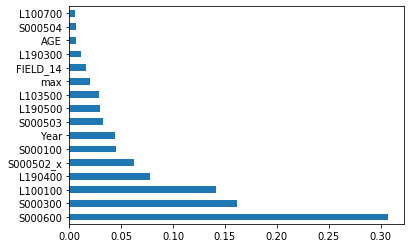

Index(['S000600', 'S000300', 'L100100', 'L190400', 'S000502_x', 'S000100',
       'Year', 'S000503', 'L190500', 'L103500', 'max', 'FIELD_14', 'L190300',
       'AGE', 'S000504', 'L100700'],
      dtype='object')


In [52]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(16).plot(kind='barh')
plt.show()

print(feat_importances.nlargest(16).index)

============================= Backward Elimination
========

In [29]:
import statsmodels.regression.linear_model as sm
temp=x.copy()
temp['const']=np.ones((x.shape[0],1))
regressor_OLS = sm.OLS(endog = y, exog = temp).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              S000502_y   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     1128.
Date:                Thu, 10 Oct 2019   Prob (F-statistic):               0.00
Time:                        02:23:10   Log-Likelihood:            -1.5605e+05
No. Observations:               46204   AIC:                         3.122e+05
Df Residuals:                   46175   BIC:                         3.124e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
S000502_x      0.2835      0.006     49.855      0.000       0.272       0.295
S000501        0.1930      0.004     44.403      0.000       0.184       0.202
S000300        0.1871      0.013     14.260      0.000       0.161       0.213
SEX           -0.3616      0.156     -2.319      0.020      -0.667      -0.056
L190400        0.6465      0.084      7.697      0.000       0.482       0.811
L190300        1.8803      0.168     11.194      0.000       1.551       2.209
L190500       -0.3035      0.035     -8.598      0.000      -0.373      -0.234
L100700        0.2463      0.034      7.253      0.000       0.180       0.313
L103300        0.0408      0.056      0.733      0.463      -0.068       0.150
L103000        0.0006      0.001      1.143      0.253      -0.000       0.002
L100500       -0.1356      0.260     -0.523      0.601      -0.644       0.373
L101700        0.0088      0.001      8.224      0.000       0.007       0.011
L100800        0.0080      0.003      2.399      0.016       0.001       0.014
L101300       -0.0016      0.002     -0.842      0.400      -0.005       0.002
S000100       -0.0187      0.006     -2.995      0.003      -0.031      -0.006
L103100       -0.0084      0.004     -2.034      0.042      -0.016      -0.000
AGE            0.0594      0.005     12.850      0.000       0.050       0.068
S010102        0.0662      0.012      5.599      0.000       0.043       0.089
FIELD_33       0.0547      0.052      1.053      0.292      -0.047       0.157
FIELD_38       0.3163      0.032      9.995      0.000       0.254       0.378
FIELD_27       0.2620      0.138      1.898      0.058      -0.008       0.532
FIELD_29       0.7319      0.097      7.526      0.000       0.541       0.923
FIELD_40       0.0400      0.029      1.389      0.165      -0.016       0.097
FIELD_41      -0.0138      0.028     -0.495      0.621      -0.068       0.041
FIELD_42      -0.0225      0.016     -1.385      0.166      -0.054       0.009
FIELD_28      -0.0685      0.149     -0.459      0.646      -0.361       0.224
FIELD_5       -0.0226      0.050     -0.454      0.650      -0.120       0.075
FIELD_25      -0.2750      0.208     -1.320      0.187      -0.683       0.133
const         18.1943      1.370     13.276      0.000      15.508      20.880
==============================================================================
Omnibus:                      480.706   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              504.140
Skew:                           0.236   Prob(JB):                    3.37e-110
Kurtosis:                       3.195   Cond. No.                     1.19e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is

In [30]:
# temp=temp.drop(columns=['L103100', 'S000300','L190400','L102900','L101300','S000501','S000502','L100500','FIELD_40',
#                         'FIELD_41','FIELD_29','FIELD_18','FIELD_31','FIELD_27','FIELD_25','SEX'])
# regressor_OLS = sm.OLS(endog = y, exog = temp).fit()
# regressor_OLS.summary()

In [31]:
# temp=temp.drop(columns=['FIELD_33'])
# regressor_OLS = sm.OLS(endog = y, exog = temp).fit()
# regressor_OLS.summary()

In [ ]:
print(temp.columns.shape)
temp.columns

================== Check Variance inflation factor and multi collinearity
==================== 

In [ ]:
temppd=pd.DataFrame(data2[['S000501_x', 'S000502', 'S000300', 'SEX', 'L190400', 'L190300', 'L190500', 'L100700', 
              'L103300', 'L100500', 'S000100', 'L100800', 'L103000', 'L101700', 'L101300', 'L103100', 'max',
              'FIELD_33', 'FIELD_38', 'FIELD_40', 'FIELD_29', 'FIELD_41', 'FIELD_27', 'FIELD_42', 'FIELD_5', 
              'FIELD_18', 'FIELD_25'
                          ]]).dropna()  
temppd['y']=data.S000501_y
 

corr = (temppd.corr())
sns.heatmap(corr, vmin=-1, vmax=1) 

corr.head(20)

In [ ]:

def vifcal(inputdata,depcol):
    vifL5=[]
    import statsmodels.formula.api as sm
    xvars=inputdata.drop([depcol],axis=1)
    xvarnames=xvars.columns
    for i in range(0,xvarnames.shape[0]):
        _y=xvars[xvarnames[i]]
        _x=xvars[xvarnames.drop(xvarnames[i])]
        rsq=sm.ols(formula="_y~_x",data=xvars).fit().rsquared
        vif=round(1/(1-rsq),2)
        print(i,', ',xvarnames[i]," VIF = ",vif)
        if(vif<5):
            vifL5.append(xvarnames[i])
    return vifL5
    
    
newcols = vifcal(temppd,'y')

In [ ]:
print(newcols,len(newcols))